<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%EA%B7%A0%ED%98%95%EA%B0%80%EA%B2%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가격책정에 대한 경제학 이론을 살펴봅시다 
- 시험에 파이썬 코드는 안나옵니다. 
- 개념을 잘 이해하고 엑셀로 구현하여 봅시다.

이 코드는 다음 사이트를 참조하였습니다.
https://janboone.github.io/python_economics/economics.html

- 파이선 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize
import random
plt.style.use('seaborn')
%matplotlib inline

# 수요함수 기초

- 제품에 대한 소비자 가치

In [4]:
n_consumer = 1000  # 잠재 소비자 수 
np.random.seed(0)  # 랜덤 시드 결정, 결과를 고정하기 위해

value = np.random.normal(100, 20, n_consumer)  ## 각 소비자의 제품에 대한 가치(정규분포 가정)
print(value)

[135.28104692 108.00314417 119.57475968 144.81786398 137.3511598
  80.4544424  119.00176835  96.97285583  97.93562296 108.21197004
 102.88087142 129.08547014 115.2207545  102.43350033 108.87726465
 106.67348655 129.88158146  95.89683472 106.26135403  82.91808521
  48.94020368 113.07237191 117.28872398  85.15669959 145.39509248
  70.91268651 100.91517035  96.256323   130.65558429 129.3871754
 103.09894851 107.56325039  82.24428505  60.38407064  93.04175701
 103.12697938 124.60581361 124.04759698  92.25346365  93.95394499
  79.0289407   71.59964126  65.87459619 139.0155079   89.80695636
  91.23851397  74.9440928  115.54980712  67.72204305  95.7451944
  82.09066878 107.73804996  89.78389725  76.38735632  99.43635543
 108.56663741 101.33034445 106.04943795  87.31355813  92.74517668
  86.55079104  92.80893677  83.73707436  65.47434795 103.54852285
  91.96438128  67.39603306 109.25564511  81.85403271 101.03890792
 114.58181124 102.57965822 122.78801369  75.30348359 108.04683282
  86.30379818

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c017705d0>]],
      dtype=object)

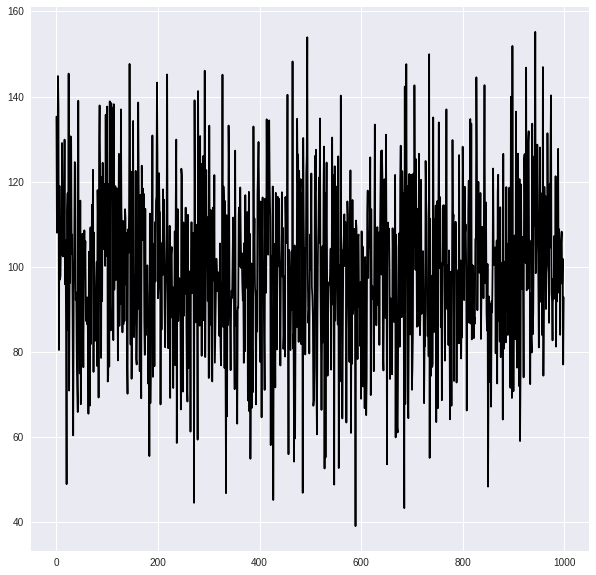

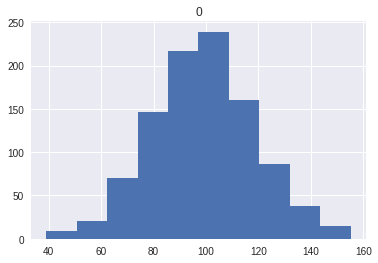

In [5]:
plt.figure(figsize=(10,10))

plt.plot(value, "black")  # 그림으로 그려봅시다
pd.DataFrame(value).hist()

- 수요함수 정의 

언제 구매가 이루어질까요?

In [6]:
def demand(p, value):                           ## 가격이 주어질 경우, 
  return np.count_nonzero(np.array(value) > p)  ## value > price 인 소비자 수를 리턴 

In [12]:
demand(100,value)  # 가격이 100 일때, 수요는?

476

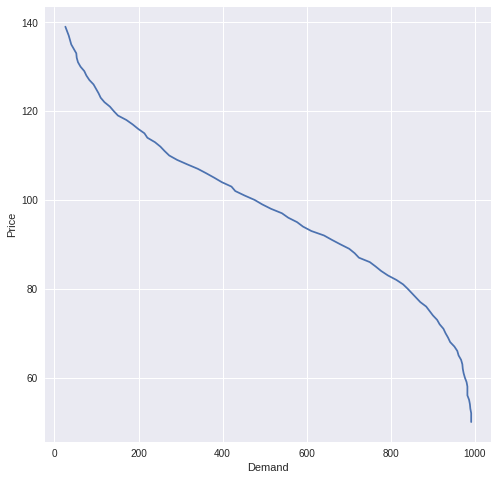

In [13]:
plt.figure(figsize=(8,8))
range_p = np.arange(50,140)    # 가격의 범위 설정
plt.plot([demand(p,value) for p in range_p],range_p) # 주어진 가격범위에서 수요를 그림으로
plt.xlabel("Demand")           # 경제학은 관습적으로 가격을 y축에 그림
plt.ylabel("Price")             
plt.show()

- 소득 수준

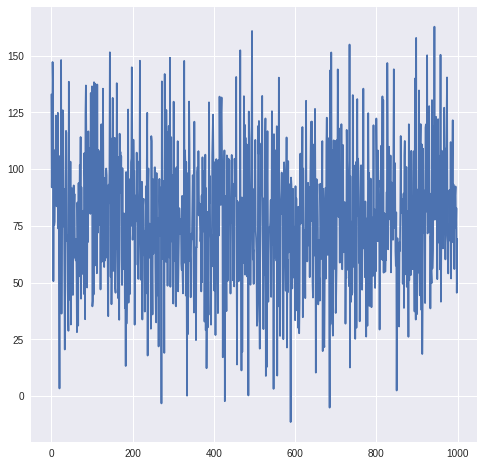

In [14]:
np.random.seed(0)
income = np.random.normal(80, 30, n_consumer)   ## 정규분포 가정(80=mean, 30=SD)
plt.figure(figsize=(8,8))
plt.plot(income)

**- 언제 구매가 이루어질까요?**

In [15]:
def afford(p,income):     ## 조건#1: 가격이 주어지면 
    return 1*(income>p)   ## income > price 이면 1로 표시한다  

def wtp(p,value):         ## 조건#2: 가격이 주어지면 
    return 1*(value>p)    ## value > price 이면 1로 표시한다

# 새로운 수요함수 정의
def demand_2(p,value,income):  ## 두 조건이 모두 만족되어야 구매
    return np.sum(afford(p,income)*wtp(p,value))  ## 두 조건이 만족되는 소비자(afford=1, wtp=1)의 수의 수를 리턴 

In [16]:
 price=100           # 가격수준을 가정하자
x1=pd.DataFrame(afford(price,income))
x1.columns=["afforable?"]
x1["value above price?"]=wtp(price,value)
x1["buy?"]=afford(price,income)*wtp(price,value)

x1

,afforable?,value above price?,buy?
0,1,1,1
1,0,1,0
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
995,0,1,0
996,0,0,0
997,0,1,0
998,0,0,0


In [17]:
demand_2(price,value,income)   # 가격이 100 일때 수요

236

- 가격을 50으로 내려보자

In [18]:
demand_2(50,value,income)

840

- 소비자 잉여 (Consumer surplus)

In [19]:
def CS(p,value,income):   # 가격을 입력하면
    return np.sum(afford(p,income)*wtp(p,value)*(value-p))   ## 두 조건을 만족하는 소비자에 대해 value-p 만큼을 합산한다. 

In [20]:
price=100  # 가격이 100 이라면
print("Consumer surplus=", CS(price, value, income))

Consumer surplus= 5942.621487952012


# 독점기업의 가격 결정

In [23]:
unit_cost=30  ## 단위당 생산비용을 가정하자

- 이윤함수 설정

In [24]:
def profits(p):   # 가격을 입력하면
    return (p-unit_cost)*demand_2(p,value,income)   ## 단위당 마진(p - unit_cost)에 수요를 곱해 계산된다 

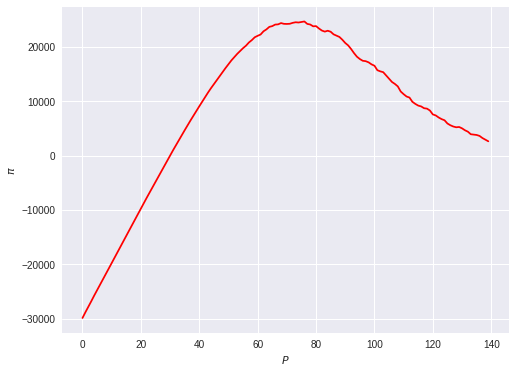

In [25]:
plt.figure(figsize=(8,6))

range_p = np.arange(0,140)                                          # 주어진 가격범위에서
plt.plot(range_p, [profits(p) for p in range_p],"r")  # 이윤을 그림으로 그려보자
plt.xlabel("$P$")
plt.ylabel("$\pi$")
plt.show()

- 최적가격이 얼마인가?

In [26]:
p_m =  optimize.fminbound(lambda x: -profits(x),0,140)
print("===========")
print("optimal price=", p_m)              # 최적 가격
print("===========")
print("Monopoly profits=", profits(p_m))  #  최적가격에서의 이윤
print("===========")
print("Supply=Demand=", demand_2(p_m,value,income) ) #  최적가격에서의 수요와 공급 (공급은 수요만큼)
print("===========")
print("Social Welfare=", profits(p_m) + CS(p_m, value, income)) #  최적가격에서의 사회후생(이윤+소비자잉여) 

optimal price= 76.45507441783815
Monopoly profits= 24667.644515872056
Supply=Demand= 531
Social Welfare= 44504.77539646452


# 완전경쟁 시장이면??

- 가격이 얼마인가?

In [27]:
p_c=unit_cost   ## price=marginal cost

- 이윤과 공급, 후생은 어떻게 결정되는가?

In [28]:
p_c =  unit_cost
print("===========")
print("Price=", p_c)              # 최적 가격
print("===========")
print("Profits=", profits(p_c))  #  최적가격에서의 이윤
print("===========")
print("Supply=Demand=", demand_2(p_c,value,income) ) #  최적가격에서의 수요와 공급 (공급은 수요만큼)
print("===========")
print("Social Welfare=", CS(p_c, value, income))     #  최적가격에서의 소비자잉여 (이윤은 0)

Price= 30
Profits= 0
Supply=Demand= 954
Social Welfare= 67813.4018701353


- 독점으로 인해 소비자후생은 얼마나 감소하였는가?

In [29]:
print("-------")
print("(1) Perfect competition =", CS(p_c, value, income) )
print("-------")
print("(2) Monopoly =", CS(p_m, value, income) ) 
print("-------")
print("(1)-(2) =", CS(p_c, value, income)-CS(p_m, value, income))

-------
(1) Perfect competition = 67813.4018701353
-------
(2) Monopoly = 19837.13088059247
-------
(1)-(2) = 47976.270989542834


- 독점으로 인해 사회후생은 얼마나 감소하였는가?

In [30]:
print("-------")
print("(3) Perfect competition =", CS(p_c, value, income) )
print("-------")
print("(4) Monopoly =", CS(p_m, value, income)  + profits(p_m) )
print("-------")
print("(3)-(4) =", CS(p_c, value, income)-CS(p_m, value, income)-profits(p_m) )

-------
(3) Perfect competition = 67813.4018701353
-------
(4) Monopoly = 44504.77539646452
-------
(3)-(4) = 23308.626473670778


**굵은 텍스트**# 과점시장: 두 기업이 경쟁하면??